In [1]:
%config IPCompleter.greedy=True

In [26]:
from flask_sqlalchemy import SQLAlchemy
from flask import Flask
from datetime import datetime, timedelta, date, time
import random
import calendar

# from sqlalchemy.orm import Session
from sqlalchemy import select

app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///task.db'
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
db = SQLAlchemy(app)


class Task(db.Model):
    """Data Model for Events Happening"""

    __tablename__ = 'tasks'
    id = db.Column(db.Integer, primary_key=True)
    name = db.Column(db.String(64), index=False, unique=False, nullable=False)
    category = db.Column(db.String(64), index=False, unique=False, nullable=True)
    subcategory1 = db.Column(db.String(64), index=False, unique=False, nullable=True)
    subcategory2 = db.Column(db.String(64), index=False, unique=False, nullable=True)
    priority = db.Column(db.Integer, index=False, unique=False, nullable=False)
    add_date = db.Column(db.DateTime, index=False, unique=False, nullable=False)
    complete_date = db.Column(db.DateTime, index=False, unique=False, nullable=True)

    def __repr__(self):
        return f'''Task(name = {self.name}, category = {self.category},
            subcategory1 = {self.subcategory1}, subcategory2 = {self.subcategory2},
            priority = {self.priority}, 
            add_date = {self.add_date}, complete_date = {self.complete_date}
            '''


db.init_app(app)
db.create_all()


def add_fake_tasks(number):
    for _ in range(number):
        tstamp = datetime.utcnow() - timedelta(days=random.randint(0, 100))
        completed = (tstamp + timedelta(days=random.randint(0, 100)), None, None, None)
        task = {
            'name': f'task {random.random()}',
            'category': 'financial',
            'subcategory1': None,
            'subcategory2': None,
            'priority': random.randint(0, 100),
            'add_date': tstamp,
            'complete_date': random.choice(completed),
        }
        db.session.add(Task(**task))
    db.session.commit()


add_fake_tasks(100)


In [27]:
today = datetime.combine(date.today(), time())
tomorrow = today + timedelta(days=1)
yesterday = today - timedelta(days=1)
previous_7 = today - timedelta(days=7)
previous_30 = today - timedelta(days=30)
week_start = datetime.combine(
    date.fromisocalendar(today.year, today.isocalendar().week, 1), time()
)
week_end = week_start + timedelta(days=7)
_month_days = calendar.monthrange(today.year, today.month)[1]
month_start = datetime(today.year, today.month, 1)
month_end = datetime(today.year, today.month, _month_days)
year_start = datetime(today.year, 1, 1)
year_end = datetime(today.year, 12, 31)

In [35]:
completed = db.session.execute(
    select(Task)
    .where(Task.complete_date > month_start, Task.complete_date < month_end)
    .order_by(Task.priority.asc(), Task.add_date.asc())
).scalars().all()


In [36]:
from collections import Counter

In [42]:
count = Counter(task.complete_date.day for task in completed)
count

Counter({5: 76,
         19: 3,
         4: 2,
         9: 3,
         2: 4,
         16: 2,
         12: 2,
         28: 1,
         8: 4,
         7: 3,
         23: 1,
         3: 2,
         1: 1,
         14: 3,
         20: 1,
         11: 3,
         22: 2,
         25: 1,
         17: 2,
         26: 2,
         24: 2,
         29: 1,
         27: 1,
         18: 1,
         10: 2,
         21: 1,
         15: 1})

In [38]:
x = count.keys()
y = count.values()

In [39]:
import base64
from io import BytesIO
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
%matplotlib inline

In [40]:
fig = Figure()
ax = fig.subplots()
ax.bar(x, y)


<BarContainer object of 27 artists>

<BarContainer object of 27 artists>

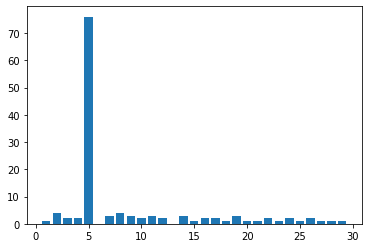

In [41]:
plt.bar(x, y)